In [1]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
dataset = pd.read_csv('data30062023/iklan_sosmed.csv', delimiter = ';')

In [3]:
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [7]:
X = dataset.iloc[:, 2:-1]
y = dataset.iloc[:, -1]

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# cek nan & imputasi pada data train & test
# X_train.isnull().sum()
# X_test.isnull().sum()
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

In [9]:
# cek data kategorik & lakukan mapping

In [10]:
# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test

In [12]:
# normalisasi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# buat klasifier dan lakukan training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [15]:
#prediksi X_test
y_pred = classifier.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [17]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Transaksi, Length: 80, dtype: int64

In [18]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [19]:
print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 92.5%
Confussion Matrix : 
[[57  1]
 [ 5 17]]


C:\Users\IHBS TV\AppData\Local\Temp\ipykernel_6976\3241653287.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


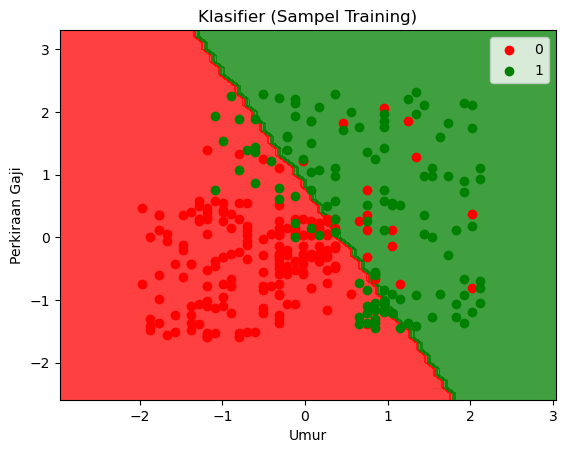

In [21]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    
#     # Pilih subset acak dari data training
# subset_indices = np.random.choice(len(X_train), size=100, replace=False)
# X_subset = X_train[subset_indices]
# y_subset = y_train[subset_indices]

        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
    
#     plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap=ListedColormap(('red', 'green')))
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

C:\Users\IHBS TV\AppData\Local\Temp\ipykernel_6976\752173082.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


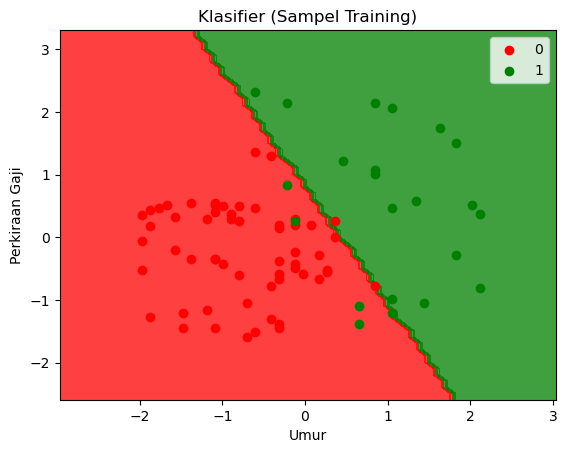

In [22]:
# visualisasi sampel data test
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    
#     # Pilih subset acak dari data training
# subset_indices = np.random.choice(len(X_train), size=100, replace=False)
# X_subset = X_train[subset_indices]
# y_subset = y_train[subset_indices]

        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
    
#     plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap=ListedColormap(('red', 'green')))
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

In [ ]:
# buat klasifier dan lakukan training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

In [ ]:
# prediksi X_test
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [ ]:
print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

In [ ]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    
    # Pilih subset acak dari data training
subset_indices = np.random.choice(len(X_train), size=100, replace=False)
X_subset = X_train[subset_indices]
y_subset = y_train[subset_indices]

#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
    
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap=ListedColormap(('red', 'green')))
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()


In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
